In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [75]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [77]:
#this will give me the count of different categories in the sex column.
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

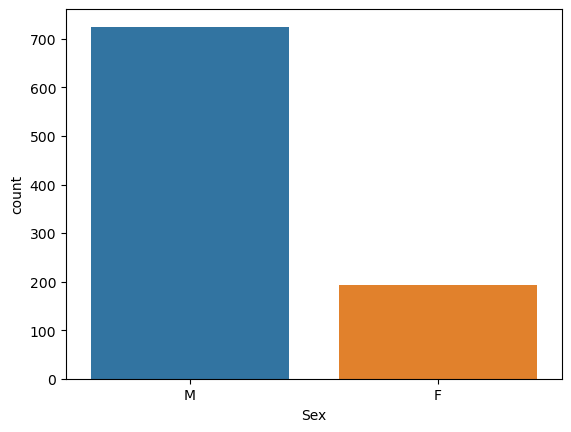

In [78]:
# graphical representation of the above data
sns.countplot(x = "Sex", data=df)
plt.show()

In [79]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

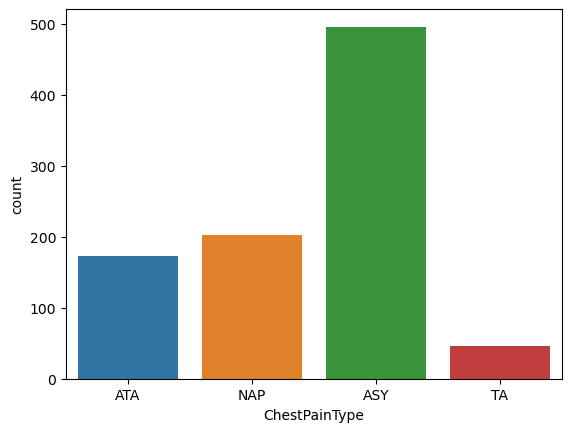

In [80]:
sns.countplot(x = "ChestPainType", data=df)
plt.show()

In [81]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

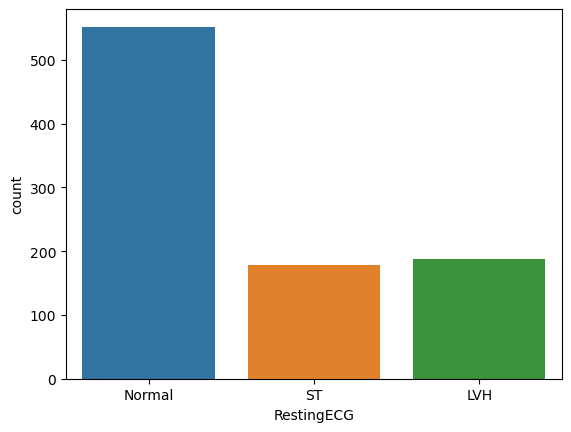

In [82]:
sns.countplot(x = "RestingECG", data=df)
plt.show()

In [83]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

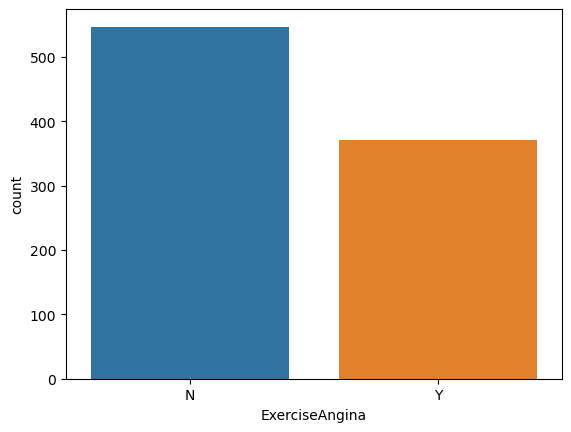

In [84]:
sns.countplot(x = "ExerciseAngina", data=df)
plt.show()

In [85]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

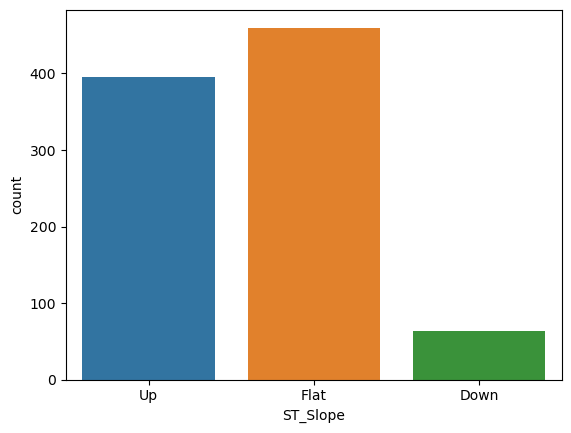

In [86]:
sns.countplot(x = "ST_Slope", data=df)
plt.show()

In [87]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


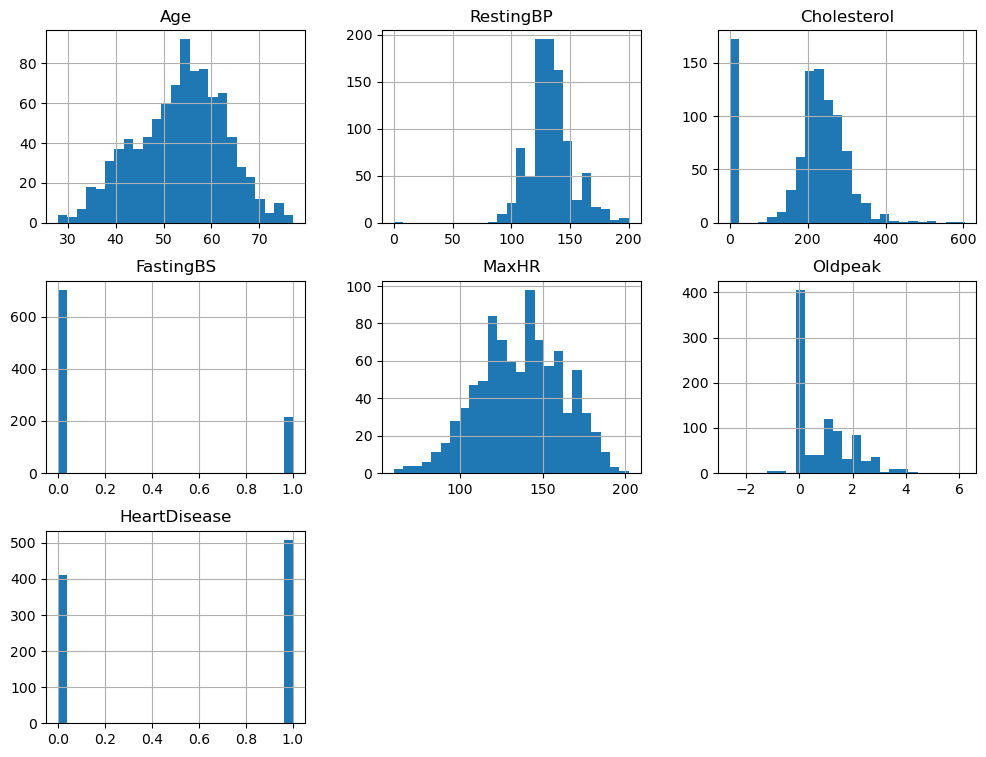

In [88]:
df.hist(bins = 25, figsize=(12,9))
plt.show()

In [89]:
#checking if there are duplicate rows and dropping them if any present.
print("Number of duplicates ", np.sum(df.duplicated()))
df.drop_duplicates(inplace=True)
print("Number of duplicates after dropping ", np.sum(df.duplicated()))

Number of duplicates  0
Number of duplicates after dropping  0


In [90]:
corr_matrix = df.corr(numeric_only=True)

<Axes: >

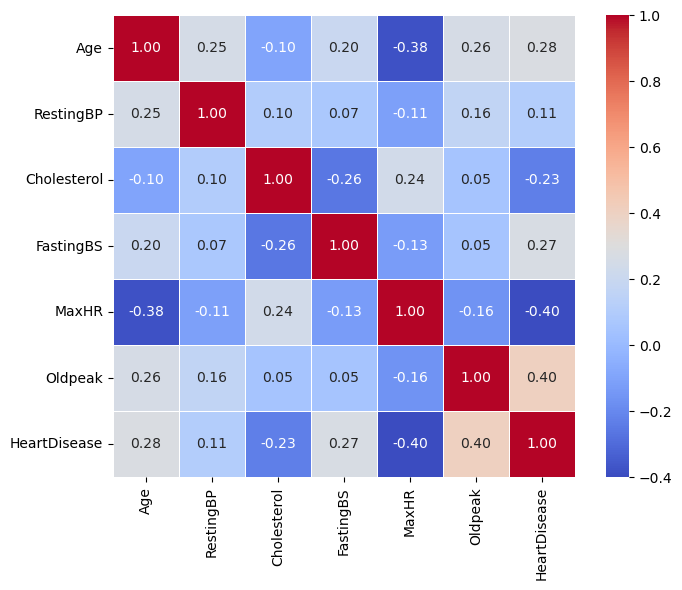

In [91]:
corr_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(8, 6))  # You can adjust the size of the heatmap as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)

In [92]:
corr_matrix["HeartDisease"].sort_values(ascending = False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

### Changing the Object Data in the Numerical Data (We can also use ItidfVectorizer, I choose long method)

In [93]:
Sex_category = df[['Sex']]
Sex_category.head(10)

,Sex
0,M
1,F
2,M
3,F
4,M
5,M
6,F
7,M
8,M
9,F


In [94]:
Cheast_pain_type = df[['ChestPainType']]
Cheast_pain_type.head(10)

,ChestPainType
0,ATA
1,NAP
2,ATA
3,ASY
4,NAP
5,NAP
6,ATA
7,ATA
8,ASY
9,ATA


In [95]:
Resting_ECG = df[['RestingECG']]
Resting_ECG.head(10)

,RestingECG
0,Normal
1,Normal
2,ST
3,Normal
4,Normal
5,Normal
6,Normal
7,Normal
8,Normal
9,Normal


In [96]:
"""Exercise Angina: A type of chest pain or discomfort that occurs during physical exertion due to reduced blood 
flow to the heart, typically caused by narrowed or blocked coronary arteries. It is a symptom of angina pectoris 
and is often associated with coronary artery disease (CAD)."""
Exercise_Angina = df[['ExerciseAngina']]
Exercise_Angina.head(10)

,ExerciseAngina
0,N
1,N
2,N
3,Y
4,N
5,N
6,N
7,N
8,Y
9,N


In [97]:
ST_Slope = df[["ST_Slope"]]
ST_Slope.head(10)

,ST_Slope
0,Up
1,Flat
2,Up
3,Flat
4,Up
5,Up
6,Up
7,Up
8,Flat
9,Up


#### To tranform the object data type into numerical data type

In [98]:
# transforming categorical data into numeric data where the categories have a meaningful order.
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
sex_transform = ordinal_encoder.fit_transform(Sex_category)
Cheast_pain_type_transform = ordinal_encoder.fit_transform(Cheast_pain_type)
Resting_ECG_transform = ordinal_encoder.fit_transform(Resting_ECG)
Exercise_Angina_transform = ordinal_encoder.fit_transform(Exercise_Angina)
ST_Slope_transform = ordinal_encoder.fit_transform(ST_Slope)

In [99]:
sex_transform[:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]])

In [100]:
# it converts the categorical data into numerical values.
Cheast_pain_type_transform[:10]

array([[1.],
       [2.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.]])

In [101]:
Resting_ECG_transform[:10]

array([[1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [102]:
Exercise_Angina_transform[:10]

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [103]:
ST_Slope_transform[:10]

array([[2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.]])

In [104]:
# replacing the original columns with the transformed one
df['Sex'] = sex_transform
df['ChestPainType'] = Cheast_pain_type_transform
df['RestingECG'] = Resting_ECG_transform
df['ExerciseAngina'] = Exercise_Angina_transform
df['ST_Slope'] = ST_Slope_transform

In [105]:
from sklearn.model_selection import train_test_split

# X contains all the features (everything except the target variable)
X = df.drop("HeartDisease", axis=1)

# y contains the target variable (the label we want to predict)
y = df["HeartDisease"]

# Split the data into training and testing sets
# 80% of the data will be used for training, 20% will be used for testing
# random_state is set to 42 for reproducibility (same result every time you run)
# stratify=y ensures that the split has the same proportion of HeartDisease values as in the original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


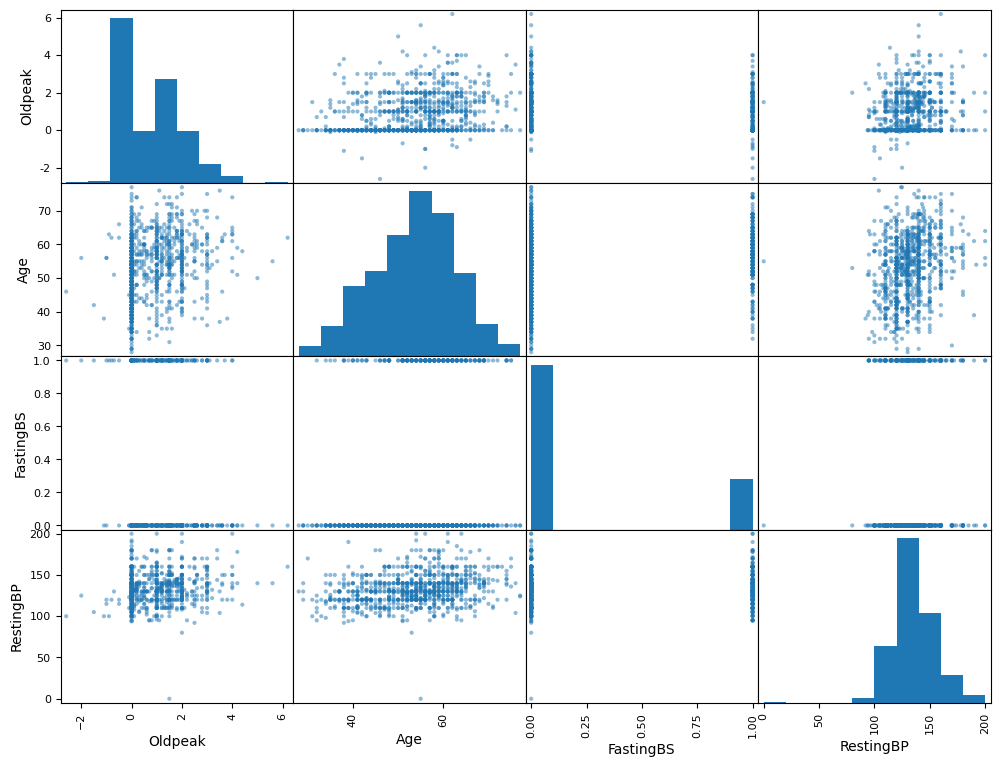

In [106]:
from pandas.plotting import scatter_matrix

attributes = ["Oldpeak", "Age", "FastingBS", "RestingBP"]

# Creating the scatter plot matrix for the selected attributes
scatter_matrix(df[attributes], figsize=(12,9))
plt.show()

In [107]:
from sklearn.linear_model import LogisticRegression

# Creating an instance of LogisticRegression model
# max_iter=1000 increases the number of iterations for convergence, random_state=42 ensures reproducibility
log_clf = LogisticRegression(max_iter=1000,random_state=42)

# Training the model with the training data (X_train and y_train)
log_clf.fit(X_train, y_train)

# Predicting the target values (HeartDisease) for the training data
log_clf.predict(X_train)

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [108]:
# Importing cross_val_score for cross-validation and accuracy_score for calculating accuracy
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Performing cross-validation with the logistic regression model (log_clf)
# splitting the data into 3 folds for cross-validation
# scoring="accuracy" means we are evaluating the model based on accuracy
y_pred = cross_val_score(log_clf, X_train, y_train, cv=3, scoring="accuracy")

# Printing the accuracy scores for each fold of the cross-validation
print(y_pred)

# Using the logistic regression model to make predictions on the test set
yp = log_clf.predict(X_test)


[0.86938776 0.85306122 0.81967213]


In [109]:
from sklearn.model_selection import cross_val_predict

# Using cross-validation to make predictions on the training data (X_train)

y_cross_pred = cross_val_predict(log_clf, X_train, y_train, cv=3)
print(y_cross_pred)

[1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1
 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1
 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1
 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1
 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1
 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1
 0 1 0 0 1 1 0 0 1 1 1 1 

In [110]:
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix using the actual values (y_train) and the predicted values (y_cross_pred)

cm = confusion_matrix(y_train, y_cross_pred)
cm

array([[271,  57],
       [ 55, 351]], dtype=int64)

In [111]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score ", precision_score(y_cross_pred, y_train))
print("Recall Score ", recall_score(y_cross_pred, y_train))

Precision Score  0.8645320197044335
Recall Score  0.8602941176470589


In [112]:
from sklearn.metrics import f1_score
print("F1_Score ", f1_score(y_cross_pred, y_train))

F1_Score  0.8624078624078625


In [114]:
# Using the decision_function to get the decision values for the first row of the training data (X_train[:1])
y_decision_pred = log_clf.decision_function(X_train[:1])

print(y_decision_pred)
threshold = 0

# Comparing the decision values with the threshold (if decision value > threshold, the prediction is 1, else 0)
y_some_decision_pred = y_decision_pred > threshold

y_some_decision_pred


[2.53415031]


array([ True])

In [137]:
from sklearn.model_selection import cross_val_predict

# Using cross-validation to get the decision scores for each sample in the training data
# `cv=3` means it will split the data into 3 parts and use each part for testing while training on the others.
# `method="decision_function"` will return decision scores instead of predicted class labels.
y_scores = cross_val_predict(log_clf, X_train, y_train, cv=3, method="decision_function")
print(y_scores)

[ 2.08620596e+00 -1.50843792e+00  1.59437680e+00  2.90792131e+00
  3.81753499e+00 -1.04703554e+00  2.61939523e+00 -2.30894681e+00
 -2.61642691e+00 -2.99058284e+00  2.03497657e+00 -3.35037285e+00
  3.32266193e+00 -1.75296173e+00  1.15101150e+00  2.29976328e+00
  3.55646902e+00  3.14646713e+00  1.42991530e+00  4.25601801e+00
  2.87100513e+00  2.88112113e+00  1.38362812e+00 -8.51812688e-01
  5.42561056e+00 -1.58784574e+00 -8.26283420e-01  2.47764491e-01
 -4.04599011e+00 -1.99983891e+00 -1.68117703e+00 -1.90943666e+00
  3.61690073e+00  3.09911110e+00 -1.48597837e+00  9.03256231e-01
  2.71333836e+00  2.51162688e+00 -3.41055580e-01  2.80551363e+00
 -2.88010672e+00  1.86964509e+00  2.06838651e+00 -8.44131972e-01
  3.46387649e+00  5.26178438e+00 -7.63461202e-01 -3.43404133e+00
  1.38234498e+00  4.67249847e+00  3.45733849e-01  1.64400135e-01
 -1.16480674e+00 -1.83184072e-01  5.38339749e-01  2.45467427e+00
  2.93492718e+00  3.57741493e+00 -2.77867213e+00  2.11245480e+00
 -2.69010558e+00  1.98692

In [138]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

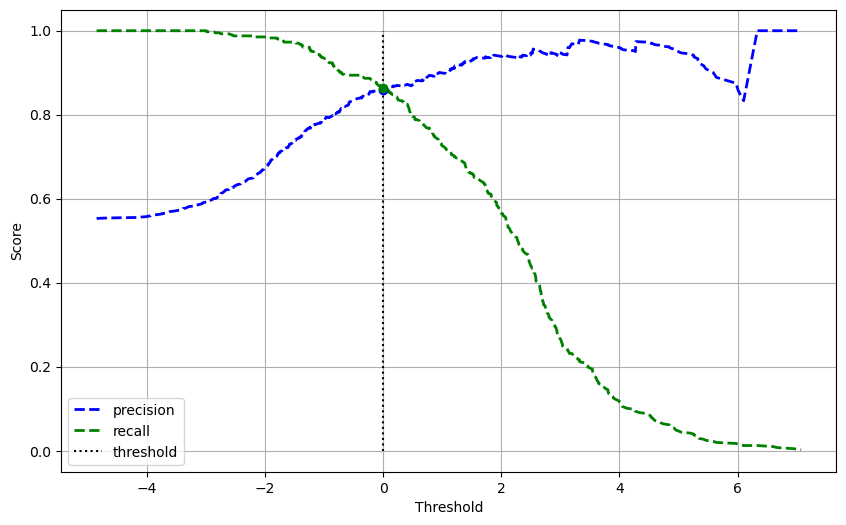

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting precision vs threshold, with blue dashed line
# 'precisions[:-1]' is used to exclude the last precision value because thresholds have one extra value
plt.plot(thresholds, precisions[:-1], "b--", label="precision", linewidth=2)

# Plotting recall vs threshold, with green dashed line
# 'recalls[:-1]' is used to exclude the last recall value
plt.plot(thresholds, recalls[:-1], "g--", label="recall", linewidth=2)

# Drawing a vertical line at the current threshold value, in dotted black line
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

plt.plot(threshold, 
         precisions[np.argmin(np.abs(thresholds - threshold))], 'bo')  # blue dot for precision
plt.plot(threshold, 
         recalls[np.argmin(np.abs(thresholds - threshold))], 'go')  # green dot for recall

plt.grid()

plt.legend()

plt.xlabel("Threshold")
plt.ylabel("Score")

# Displaying the plot
plt.show()


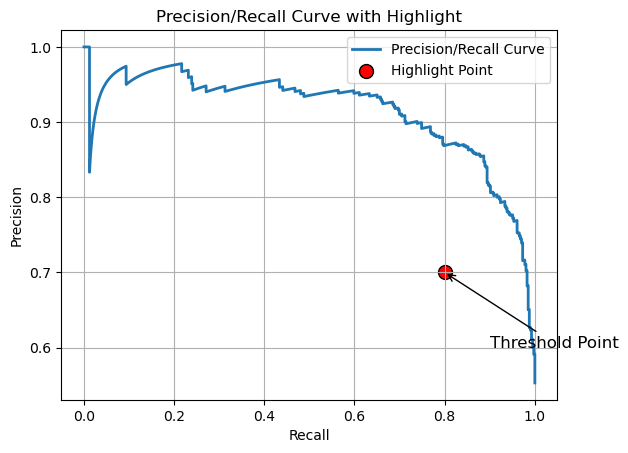

In [140]:
import matplotlib.patches as patches

# Plotting the precision/recall curve with recall on the x-axis and precision on the y-axis
# 'recalls' and 'precisions' should be arrays or lists containing recall and precision values
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall Curve")

highlight_x = 0.8 
highlight_y = 0.7  

plt.scatter(highlight_x, highlight_y, color='red', s=100, edgecolor='black', label='Highlight Point')

plt.annotate(
    'Threshold Point',  
    xy=(highlight_x, highlight_y),  
    xytext=(highlight_x + 0.1, highlight_y - 0.1), 
    arrowprops=dict(facecolor='black', arrowstyle="->"), 
    fontsize=12  
)

plt.grid(True)

plt.legend()

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.title("Precision/Recall Curve with Highlight")

plt.show()


In [ ]:
idx_for_90_precision = (precisions >= 0.80).argmax()  # can also go for 0.70
threshold_for_90_precision = thresholds[idx_for_90_precision]

# Output the threshold that gives a precision of at least 80%

threshold_for_90_precision

-0.851812688278355

In [ ]:
# Generate predictions based on the threshold for 90% precision
y_train_pred_95 = (y_scores >= threshold_for_90_precision)

In [ ]:
# Calculate the precision score by comparing the predicted labels with the true labels

precision_score(y_train_pred_95, y_train)

0.9211822660098522

In [ ]:
# Calculate the recall score by comparing the predicted labels with the true labels

recall_score(y_train_pred_95, y_train)

0.8008565310492506

In [ ]:
from sklearn.metrics import roc_curve

# Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for ROC curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

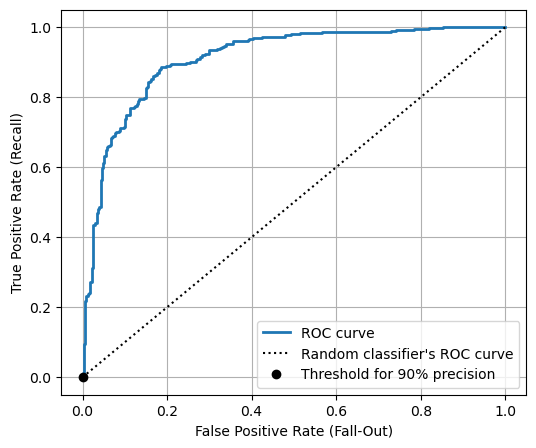

In [141]:
# Find the index of the threshold that corresponds to 90% precision
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()

# Get the corresponding True Positive Rate (TPR) and False Positive Rate (FPR) for that threshold
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")  
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")  
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")  

plt.axis()
plt.legend()  
plt.xlabel('False Positive Rate (Fall-Out)')  
plt.ylabel('True Positive Rate (Recall)') 
plt.grid()  
plt.show()  


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the Area Under the ROC Curve (AUC) score

roc_auc_score(y_train, y_scores)

0.9122086387120029

#### The above value shows this is a good model but not very good

### Let's Create another model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier model with a fixed random state for reproducibility

forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
# Train the RandomForestClassifier on the training data (X_train) and corresponding labels (y_train)

forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Perform cross-validation with the RandomForestClassifier to evaluate the model's accuracy on the training data
# 'cv=3' indicates 3-fold cross-validation, and 'scoring="accuracy"' specifies that we want to measure accuracy

y_forest_score = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")
print(y_forest_score)

[0.86938776 0.87346939 0.83606557]


In [ ]:
# Perform cross-validation to predict probabilities using the RandomForestClassifier
# 'method="predict_proba"' indicates that we want the model to return probabilities instead of class predictions

y_forest_proba = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")
print(y_forest_proba)

[[0.17 0.83]
 [0.91 0.09]
 [0.38 0.62]
 ...
 [0.01 0.99]
 [0.58 0.42]
 [0.95 0.05]]


In [142]:

y_forest_pred = y_forest_proba[:, 1]

# Calculate the precision-recall curve values for the RandomForest model
# precision_recall_curve returns precision, recall, and thresholds for different decision thresholds
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train, y_forest_pred)


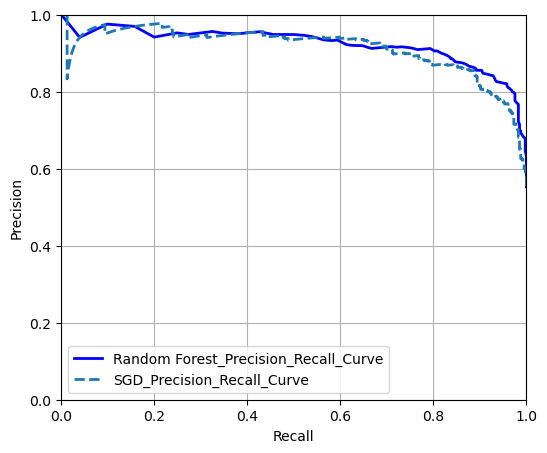

In [131]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest_Precision_Recall_Curve")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD_Precision_Recall_Curve")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
# save_fig("pr_curve_comparison_plot")

plt.show()

In [132]:
y_train_pred_forest = y_forest_proba[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train, y_train_pred_forest)

0.8754534461910519

In [ ]:
precision_score(y_train, y_train_pred_forest)

0.8598574821852731

In [134]:
recall_score(y_train, y_train_pred_forest)

0.8916256157635468

In [135]:
roc_auc_score(y_train, y_forest_pred)

0.9271746966238135